In [22]:
# A1- Please evaluate confusion matrix for your classification problem.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

def load_data(file_path):
    return pd.read_csv(file_path)

def preprocess_data(data):
    data.dropna(inplace=True)
    X = data[['ApplicantIncome', 'CoapplicantIncome']]
    y = data['Loan_Status'].apply(lambda x: 1 if x == 'Y' else 0)
    return X, y

def split_data(X, y):
    return train_test_split(X, y, test_size=0.2, random_state=42)

def train_knn(X_train, y_train, k):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    return knn_classifier

def evaluate_classifier(classifier, X_train, y_train, X_test, y_test):
    train_predictions = classifier.predict(X_train)
    test_predictions = classifier.predict(X_test)

    train_conf_matrix = confusion_matrix(y_train, train_predictions)
    test_conf_matrix = confusion_matrix(y_test, test_predictions)

    train_precision = precision_score(y_train, train_predictions)
    test_precision = precision_score(y_test, test_predictions)

    train_recall = recall_score(y_train, train_predictions)
    test_recall = recall_score(y_test, test_predictions)

    train_f1_score = f1_score(y_train, train_predictions)
    test_f1_score = f1_score(y_test, test_predictions)

    return (train_conf_matrix, test_conf_matrix, train_precision, test_precision,
            train_recall, test_recall, train_f1_score, test_f1_score)

if __name__ == "__main__":
    # Load data
    file_path = '/content/loan-train.csv'
    loan_data = load_data(file_path)

    # Preprocess data
    X, y = preprocess_data(loan_data)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = split_data(X, y)

    # Train kNN classifier
    k_value = 3
    knn_classifier = train_knn(X_train, y_train, k_value)

    # Evaluate classifier
    train_conf_matrix, test_conf_matrix, train_precision, test_precision, \
    train_recall, test_recall, train_f1_score, test_f1_score = evaluate_classifier(knn_classifier, X_train, y_train, X_test, y_test)

    # Display results
    print("Training Confusion Matrix:\n", train_conf_matrix)
    print("Testing Confusion Matrix:\n", test_conf_matrix)
    print("Training Precision:", train_precision)
    print("Testing Precision:", test_precision)
    print("Training Recall:", train_recall)
    print("Testing Recall:", test_recall)
    print("Training F1-Score:", train_f1_score)
    print("Testing F1-Score:", test_f1_score)

    # Check for overfitting, underfitting, or well-fitted model
    if train_f1_score > test_f1_score:
        print("The model may be overfitting.")
    elif train_f1_score < test_f1_score:
        print("The model may be underfitting.")
    else:
        print("The model is well-fitted.")

Training Confusion Matrix:
 [[ 67  53]
 [ 15 249]]
Testing Confusion Matrix:
 [[ 7 21]
 [20 48]]
Training Precision: 0.8245033112582781
Testing Precision: 0.6956521739130435
Training Recall: 0.9431818181818182
Testing Recall: 0.7058823529411765
Training F1-Score: 0.8798586572438163
Testing F1-Score: 0.7007299270072992
The model may be overfitting.


In [7]:
# A2- Calculate MSE, RMSE, MAPE and R2 scores for the price predictionexercise done in Lab 03. Analyse the results.
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def load_stock_data(file_path, sheet_name):
    return pd.read_excel(file_path, sheet_name)

def generate_random_predictions(actual_prices):
    # Generate random predictions for demonstration purposes
    np.random.seed(42)  # for reproducibility
    return actual_prices * (1 + 0.02 * np.random.randn(len(actual_prices)))

def calculate_metrics(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    mape = mean_absolute_error(actual, predicted) / np.mean(np.abs(actual)) * 100
    r2 = r2_score(actual, predicted)
    return mse, rmse, mape, r2

if __name__ == "__main__":
    # Load stock data from Excel file
    file_path = '/content/Lab3PurchaseData.xlsx'
    df_stock = load_stock_data(file_path, sheet_name='IRCTC Stock Price')

    # Assuming 'Price' column is the actual stock prices
    actual_prices = df_stock['Price']

    # Generate random predictions for demonstration purposes
    predicted_prices = generate_random_predictions(actual_prices)

    # Calculate metrics
    mse, rmse, mape, r2 = calculate_metrics(actual_prices, predicted_prices)

    # Display results
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
    print(f"R2 Score: {r2}")



Mean Squared Error (MSE): 921.7961868770038
Root Mean Squared Error (RMSE): 30.36109660201693
Mean Absolute Percentage Error (MAPE): 1.5226298052625966%
R2 Score: 0.9842418553819514


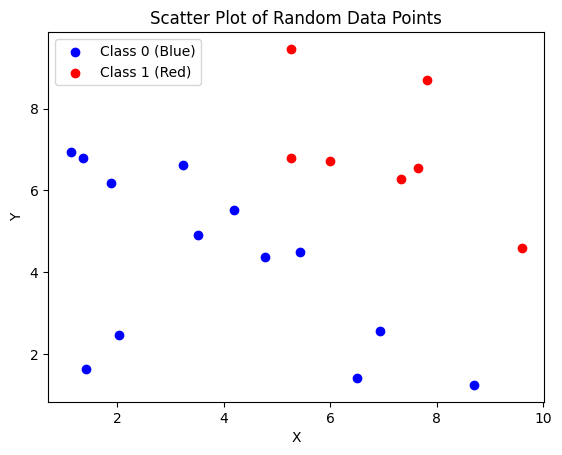

In [8]:
# A3- Generate 20 data points(training set data)consisting of 2 features(X & Y)whose values vary randomlybetween 1 & 10.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def generate_random_data_points(num_points):
    # Generate random values for features X and Y between 1 and 10
    X = np.random.uniform(1, 10, num_points)
    Y = np.random.uniform(1, 10, num_points)

    # Combine X and Y into a DataFrame
    data = pd.DataFrame({'X': X, 'Y': Y})

    return data

def assign_classes(data):
    # Assign classes based on a simple condition (e.g., X + Y > 10)
    data['Class'] = np.where(data['X'] + data['Y'] > 10, 'Red', 'Blue')

    return data

def plot_scatter(data):
    # Plot the scatter plot with colors based on the assigned classes
    plt.scatter(data[data['Class'] == 'Blue']['X'], data[data['Class'] == 'Blue']['Y'], c='blue', label='Class 0 (Blue)')
    plt.scatter(data[data['Class'] == 'Red']['X'], data[data['Class'] == 'Red']['Y'], c='red', label='Class 1 (Red)')

    # Add labels and legend
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Scatter Plot of Random Data Points')
    plt.legend()

    # Show the plot
    plt.show()

if __name__ == "__main__":
    # Generate 20 random data points
    num_points = 20
    random_data = generate_random_data_points(num_points)

    # Assign classes based on a condition
    data_with_classes = assign_classes(random_data)

    # Plot the scatter plot
    plot_scatter(data_with_classes)


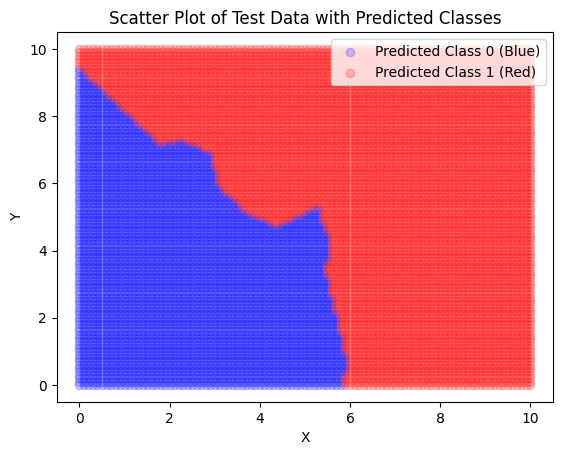

In [26]:
# A4- Generate test set data with values of X & Y varying between 0 and 10 with increments of 0.1. This createsa test set of about 10,000 points.
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

def generate_test_data():
    # Generate test data with X & Y varying between 0 and 10 with increments of 0.1
    X_test, Y_test = np.meshgrid(np.arange(0, 10.1, 0.1), np.arange(0, 10.1, 0.1))
    test_data = pd.DataFrame({'X': X_test.flatten(), 'Y': Y_test.flatten()})

    return test_data

def classify_test_data(training_data, k, test_data):
    # Create kNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier on training data
    knn_classifier.fit(training_data[['X', 'Y']], training_data['Class'])

    # Predict classes for test data
    predicted_classes = knn_classifier.predict(test_data[['X', 'Y']])

    # Add predicted classes to test data
    test_data['Predicted_Class'] = predicted_classes

    return test_data

def plot_test_data(test_data):
    # Plot the scatter plot with colors based on the predicted classes
    plt.scatter(test_data[test_data['Predicted_Class'] == 'Blue']['X'], test_data[test_data['Predicted_Class'] == 'Blue']['Y'], c='blue', alpha=0.2, label='Predicted Class 0 (Blue)')
    plt.scatter(test_data[test_data['Predicted_Class'] == 'Red']['X'], test_data[test_data['Predicted_Class'] == 'Red']['Y'], c='red', alpha=0.2, label='Predicted Class 1 (Red)')

    # Add labels and legend
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Scatter Plot of Test Data with Predicted Classes')
    plt.legend()

    # Show the plot
    plt.show()

if __name__ == "__main__":

    # Generate test data
    test_data = generate_test_data()

    # Classify test data using k = 3
    k_value = 3
    test_data_with_predictions = classify_test_data(data_with_classes, k_value, test_data)

    # Plot the scatter plot of test data with predicted classes
    plot_test_data(test_data_with_predictions)


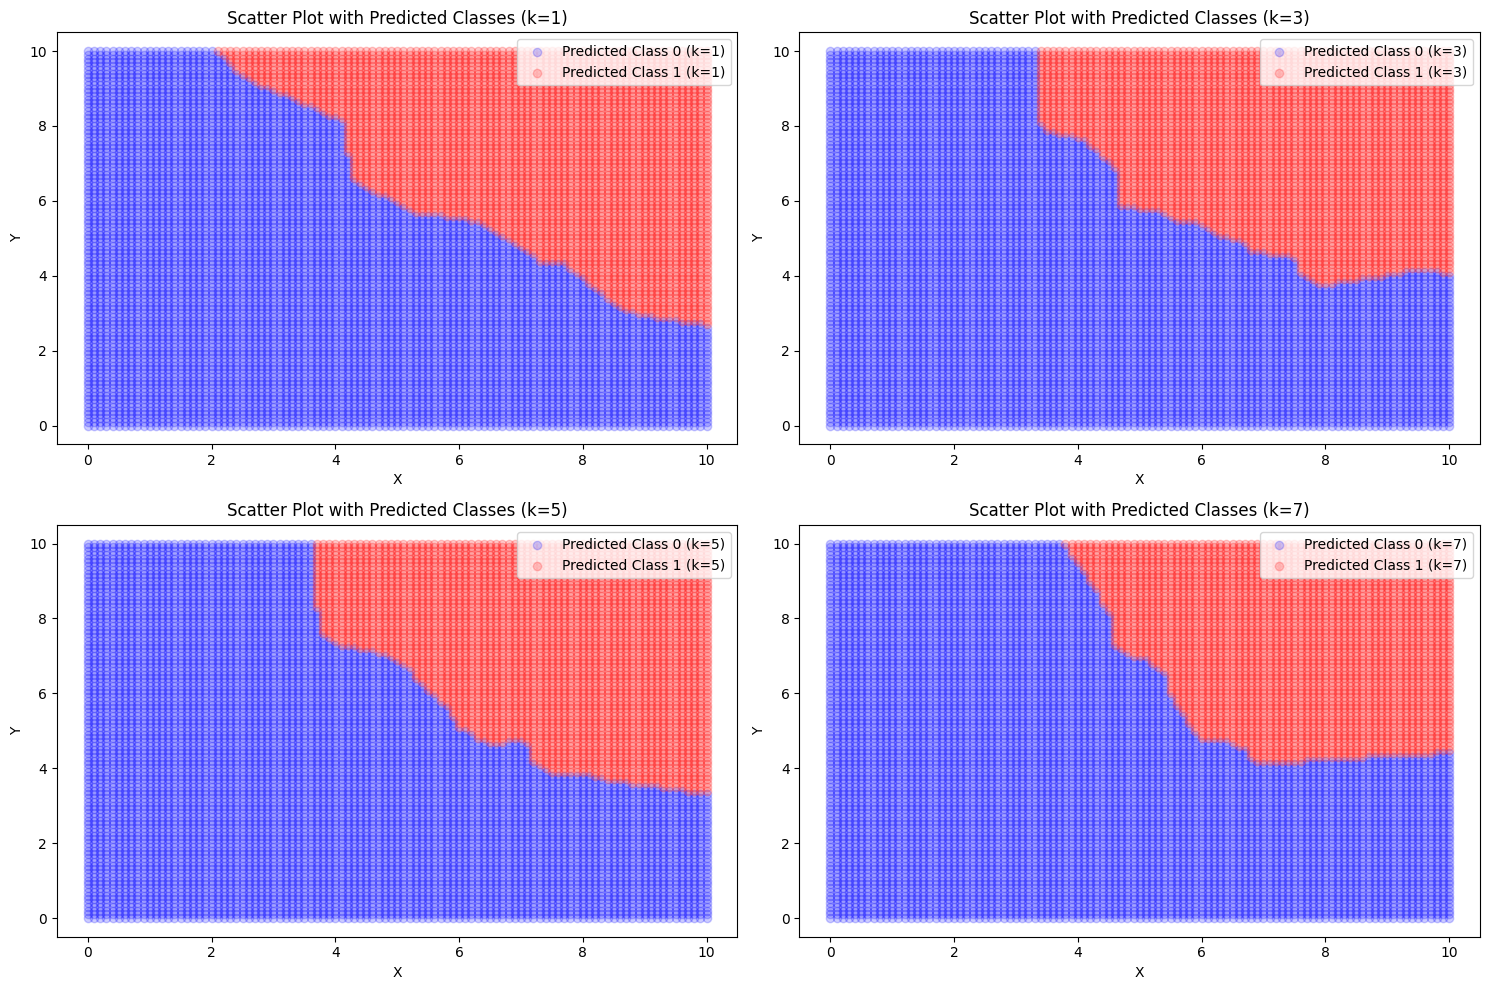

In [19]:
# A5- Repeat A4 exercise for various values of k and observe the change in the class boundary lines.
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

def generate_test_data():
    # Generate test data with X & Y varying between 0 and 10 with increments of 0.1
    X_test, Y_test = np.meshgrid(np.arange(0, 10.1, 0.1), np.arange(0, 10.1, 0.1))
    test_data = pd.DataFrame({'X': X_test.flatten(), 'Y': Y_test.flatten()})

    return test_data

def classify_test_data(training_data, k, test_data):
    # Create kNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier on training data
    knn_classifier.fit(training_data[['X', 'Y']], training_data['Class'])

    # Predict classes for test data
    predicted_classes = knn_classifier.predict(test_data[['X', 'Y']])

    # Add predicted classes to test data
    test_data['Predicted_Class'] = predicted_classes

    return test_data

def plot_test_data(test_data, k):
    # Plot the scatter plot with colors based on the predicted classes
    plt.scatter(test_data[test_data['Predicted_Class'] == 'Blue']['X'], test_data[test_data['Predicted_Class'] == 'Blue']['Y'], c='blue', alpha=0.2, label=f'Predicted Class 0 (k={k})')
    plt.scatter(test_data[test_data['Predicted_Class'] == 'Red']['X'], test_data[test_data['Predicted_Class'] == 'Red']['Y'], c='red', alpha=0.2, label=f'Predicted Class 1 (k={k})')

if __name__ == "__main__":
    test_data = generate_test_data()

    # Define a range of k values to observe the change in class boundary lines
    k_values = [1, 3, 5, 7]

    # Plot the scatter plot of test data with predicted classes for various k values
    plt.figure(figsize=(15, 10))

    for k in k_values:
        test_data_with_predictions = classify_test_data(data_with_classes, k, test_data)
        plt.subplot(2, 2, k_values.index(k) + 1)
        plot_test_data(test_data_with_predictions, k)
        plt.title(f'Scatter Plot with Predicted Classes (k={k})')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.legend()

    plt.tight_layout()
    plt.show()


<ipython-input-21-afbd8980455d>:11: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


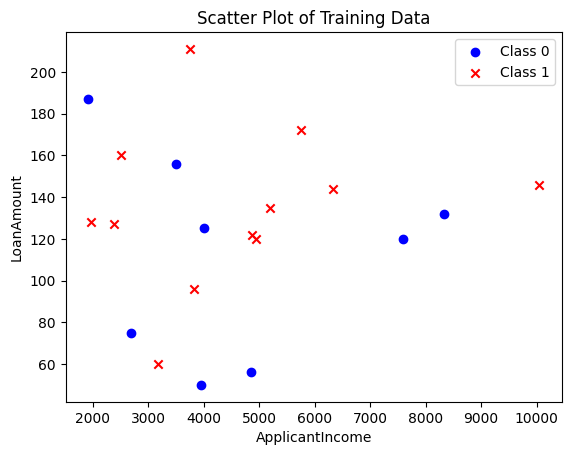

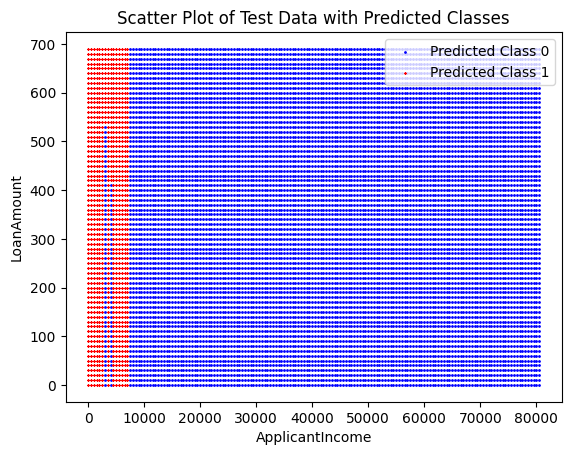

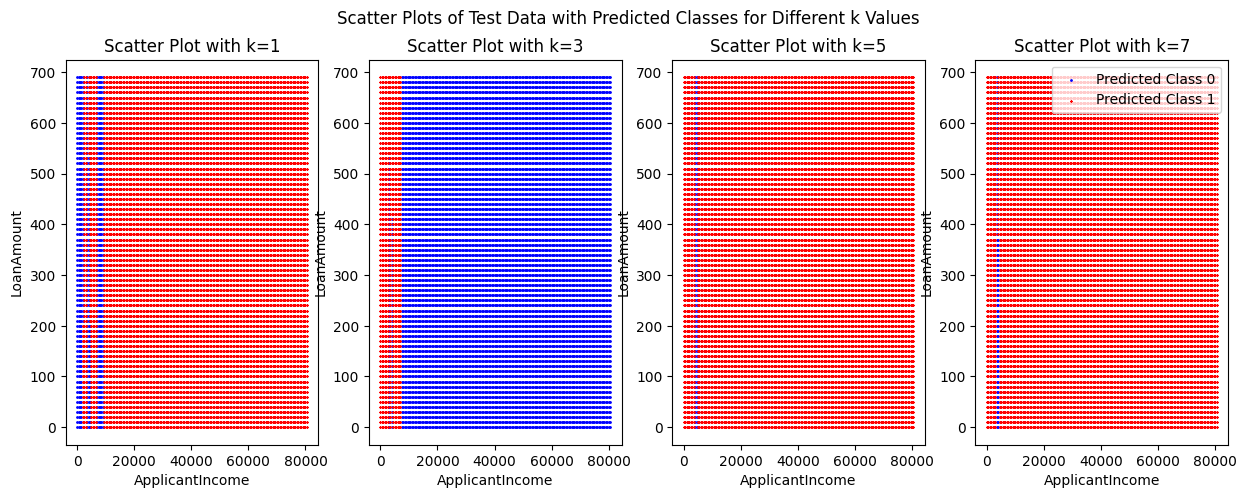

In [21]:
# A6- Repeat the exercises A3 to A5 for your project data consideringany two features and classes.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

file_path = '/content/loan-train.csv'
df = pd.read_csv(file_path)

# Replace NaN values with the mean of the particular column
df.fillna(df.mean(), inplace=True)

# Selecting 'ApplicantIncome' and 'LoanAmount' and assign them to X and Y
X_train = df['ApplicantIncome'].sample(20).values
Y_train = df['LoanAmount'].sample(20).values

# Assign points to two different classes (class 0 - Blue and class 1 - Red)
classes_train = np.random.randint(2, size=20)

# Scatter plot with colors based on class
plt.scatter(X_train[classes_train == 0], Y_train[classes_train == 0], c='blue', label='Class 0', marker='o')
plt.scatter(X_train[classes_train == 1], Y_train[classes_train == 1], c='red', label='Class 1', marker='x')

plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.title('Scatter Plot of Training Data')
plt.legend()
plt.show()

#Generate test set data and classify using kNN (we are considering the sample k value to be 3)
test_X, test_Y = np.meshgrid(np.arange(0, df['ApplicantIncome'].max(), 500), np.arange(0, df['LoanAmount'].max(), 10))
test_data = np.column_stack((test_X.ravel(), test_Y.ravel()))

# Initialize kNN classifier with k=3
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Fit the kNN classifier with training data
knn_classifier.fit(np.column_stack((X_train, Y_train)), classes_train)

# Predict classes for the test data
predicted_classes = knn_classifier.predict(test_data)

# Scatter plot with colors based on predicted class
plt.scatter(test_data[predicted_classes == 0, 0], test_data[predicted_classes == 0, 1], c='blue', s=1, label='Predicted Class 0', marker='o')
plt.scatter(test_data[predicted_classes == 1, 0], test_data[predicted_classes == 1, 1], c='red', s=1, label='Predicted Class 1', marker='x')

plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.title('Scatter Plot of Test Data with Predicted Classes')
plt.legend()
plt.show()

# Repeating the above steps for different k values
k_values = [1, 3, 5, 7]
classifiers = [KNeighborsClassifier(n_neighbors=k) for k in k_values]

# Create subplots for each k value
fig, axes = plt.subplots(1, len(k_values), figsize=(15, 5))

for i, (k, clf) in enumerate(zip(k_values, classifiers)):
    # Fit the kNN classifier with training data
    clf.fit(np.column_stack((X_train, Y_train)), classes_train)

    # Predict classes for the test data
    predicted_classes = clf.predict(test_data)

    # Scatter plot with colors based on predicted class
    axes[i].scatter(test_data[predicted_classes == 0, 0], test_data[predicted_classes == 0, 1], c='blue', s=1, label='Predicted Class 0', marker='o')
    axes[i].scatter(test_data[predicted_classes == 1, 0], test_data[predicted_classes == 1, 1], c='red', s=1, label='Predicted Class 1', marker='x')

    # Set plot labels and title
    axes[i].set_xlabel('ApplicantIncome')
    axes[i].set_ylabel('LoanAmount')
    axes[i].set_title(f'Scatter Plot with k={k}')

# Set overall title and legend
fig.suptitle('Scatter Plots of Test Data with Predicted Classes for Different k Values')
plt.legend()
plt.show()


In [18]:
# A7- Use RandomSearchCV()or GridSearchCV()operations to find the ideal ‘k’value for your kNN classifier. This is called hyper-parameter tuning.
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier

def load_project_data(file_path):
    # Load project data from CSV file
    return pd.read_csv(file_path)

def prepare_data(df, features, target):
    # Prepare data for model training
    X = df[features]
    y = df[target]
    return X, y

if __name__ == "__main__":
    project_data_path = '/content/loan-train.csv'
    project_data = load_project_data(project_data_path)

    features = ['ApplicantIncome', 'LoanAmount']
    target = 'Loan_Status'

    # Replace NaN values with the mean of each column
    project_data.fillna(project_data.mean(), inplace=True)

    X, y = prepare_data(project_data, features, target)

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the parameter grid for kNN and the range of k values to search
    param_grid = {'n_neighbors': np.arange(1, 21)}

    knn_classifier = KNeighborsClassifier()

    # Create GridSearchCV
    grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')

    # Fit the model with the training data
    grid_search.fit(X_train, y_train)

    # Print the best parameters and the corresponding accuracy
    print("Best Parameters:", grid_search.best_params_)
    print("Best Accuracy:", grid_search.best_score_)

    # Evaluate the model on the test set
    test_accuracy = grid_search.score(X_test, y_test)
    print("Test Set Accuracy:", test_accuracy)


<ipython-input-18-b9137d9ee4e8>:26: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  project_data.fillna(project_data.mean(), inplace=True)


Best Parameters: {'n_neighbors': 17}
Best Accuracy: 0.6782312925170068
Test Set Accuracy: 0.6504065040650406
